## Imports

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Load the dataset

In [44]:
df=pd.read_csv('insurance.csv')
df.head()

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
gender      1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [46]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [47]:
# Convert categorical variable into dummy/indicator variables.
df=pd.get_dummies(data=df, columns=['gender', 'smoker'], drop_first=True)

In [48]:
df=df.drop(['region'],  axis=1)
df.head()

,age,bmi,children,charges,gender_male,smoker_yes
0,19,27.900,0,16884.92400,0,1
1,18,33.770,1,1725.55230,1,0
2,28,33.000,3,4449.46200,1,0
3,33,22.705,0,21984.47061,1,0
4,32,28.880,0,3866.85520,1,0


## Exploratory Data Analysis

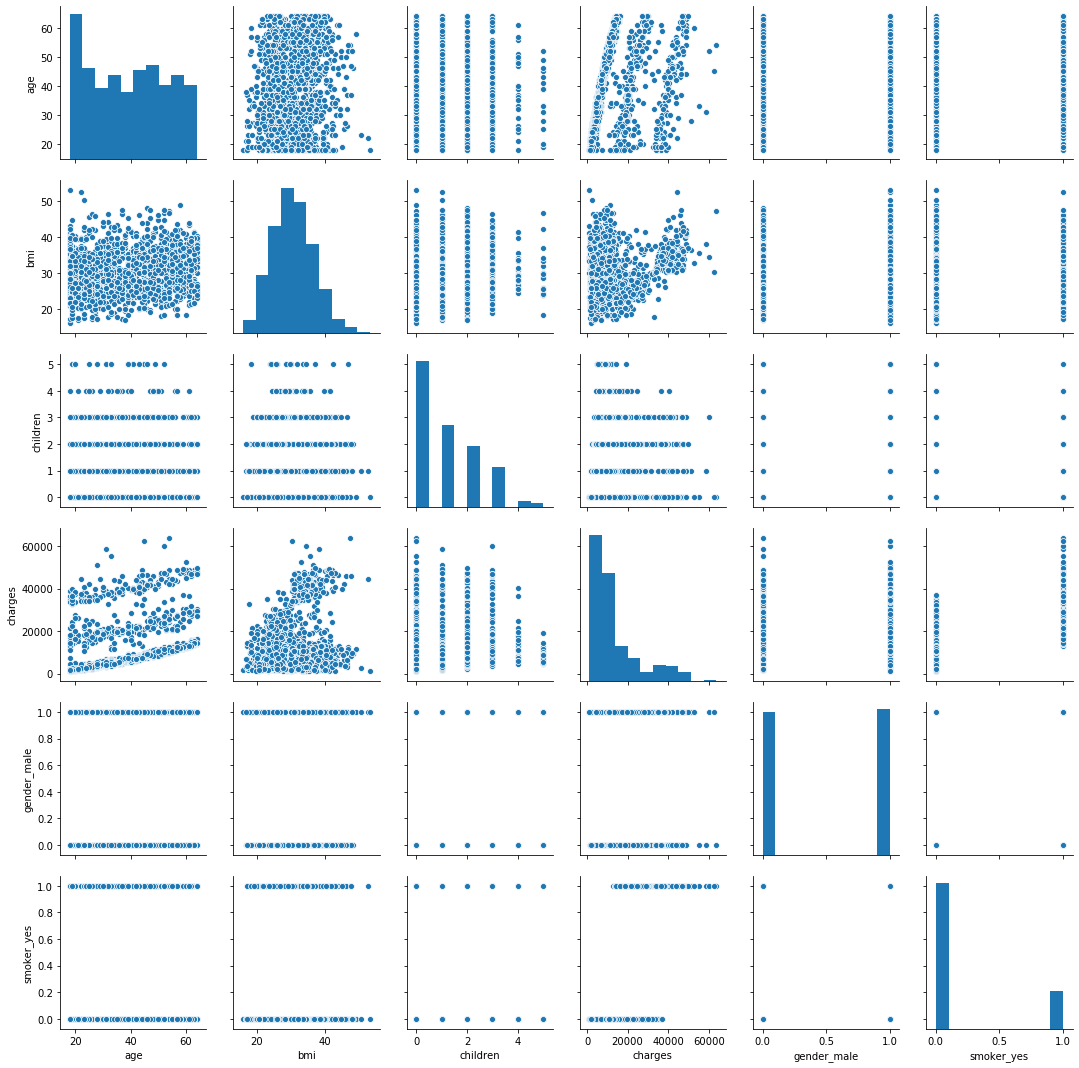

In [49]:
#pair plot of the entire dataset
sns.pairplot(df)

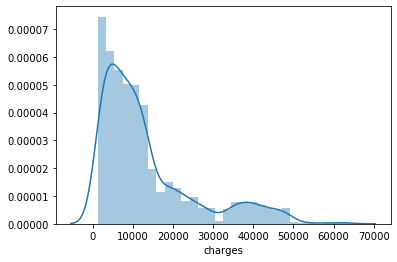

In [50]:
# Distribution plot of the target variable
sns.distplot(df['charges'])

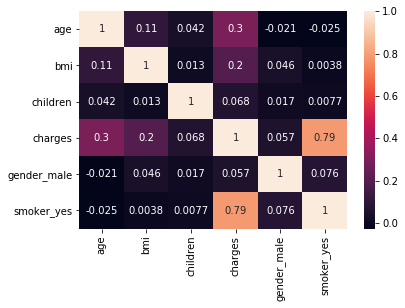

In [51]:
# HeatMap
sns.heatmap(df.corr(), annot=True)

In [53]:
df.columns

Index(['age', 'bmi', 'children', 'charges', 'gender_male', 'smoker_yes'], dtype='object')

In [54]:
X=df[['age', 'bmi', 'children', 'gender_male', 'smoker_yes']]
y=df['charges']

## Training and Testing Data

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Training the Model

In [57]:
from sklearn.linear_model import LinearRegression

In [58]:
lr=LinearRegression()

In [59]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [60]:
print(lr.intercept_)

-12538.43984985313


In [61]:
lr.coef_

array([  261.91061673,   333.36099462,   432.1792927 ,   136.65119758,
       23618.76182167])

## Predicting Test Data

In [63]:
predictions=lr.predict(X_test)

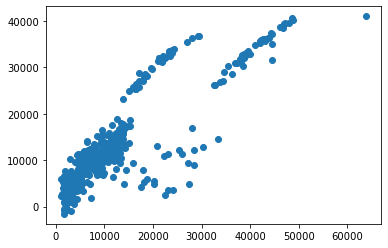

In [65]:
#scatter plot
plt.scatter(y_test, predictions)

## Residuals

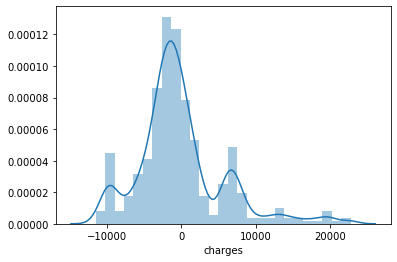

In [66]:
# distribution plot of the residuals 
sns.distplot((y_test-predictions))

## Evaluating the Model

In [67]:
from sklearn import metrics

In [68]:
# Mean Absolute Error
metrics.mean_absolute_error(y_test, predictions)

4171.013084093707

In [69]:
# Mean Square Error
metrics.mean_squared_error(y_test, predictions)

34003912.39316075

In [70]:
# Root Mean Square Error
np.sqrt(metrics.mean_squared_error(y_test, predictions))

5831.287370140555